In [18]:
# import necessary libraries

from scipy import misc
from sklearn.utils import shuffle
from tensorflow.contrib import predictor
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
# train the model
%run -i cnn_mnist_new.py

Extracting MNIST-data\train-images-idx3-ubyte.gz
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/final_mnist_hopefully/mnist_convnet_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000024C27C1E240>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /final_mnist_hopefully/mnist_convnet_model\model.ckpt.
INFO:tensorflow:probabilities = [[0.1023896  0.10492

INFO:tensorflow:loss = 2.3013706, step = 1
INFO:tensorflow:Loss for final step: 2.3013706.
INFO:tensorflow:Starting evaluation at 2018-07-21-20:44:01
INFO:tensorflow:Restoring parameters from /final_mnist_hopefully/mnist_convnet_model\model.ckpt-1
INFO:tensorflow:Finished evaluation at 2018-07-21-20:44:20
INFO:tensorflow:Saving dict for global step 1: accuracy = 0.0928, global_step = 1, loss = 2.3086603
INFO:tensorflow:Signatures INCLUDED in export for Classify: None
INFO:tensorflow:Signatures INCLUDED in export for Regress: None
INFO:tensorflow:Signatures INCLUDED in export for Predict: ['serving_default']
INFO:tensorflow:Restoring parameters from /final_mnist_hopefully/mnist_convnet_model\model.ckpt-1
INFO:tensorflow:Assets added to graph.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: b"/final_mnist_hopefully/mnist_convnet_model\\temp-b'1532205861'\\saved_model.pb"


In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [32]:
#test the trained model
img_pixels_old = pd.read_csv("Datasets/test.csv")
img_pixels_old = np.asarray(img_pixels_old)


In [34]:
#Shuffle the data and select first 100 values for testing


img_pixels_old = shuffle(img_pixels_old)
img_pixels = img_pixels_old[0:100,:]
img_pixels = np.asarray(img_pixels)

In [35]:

predict_fn = predictor.from_saved_model("/final_mnist_hopefully/mnist_convnet_model/1519324326")
predictions = predict_fn(
    {"x": img_pixels})

INFO:tensorflow:Restoring parameters from b'/final_mnist_hopefully/mnist_convnet_model/1519324326\\variables\\variables'


In [36]:
n = img_pixels.shape[0]
print(n)

100


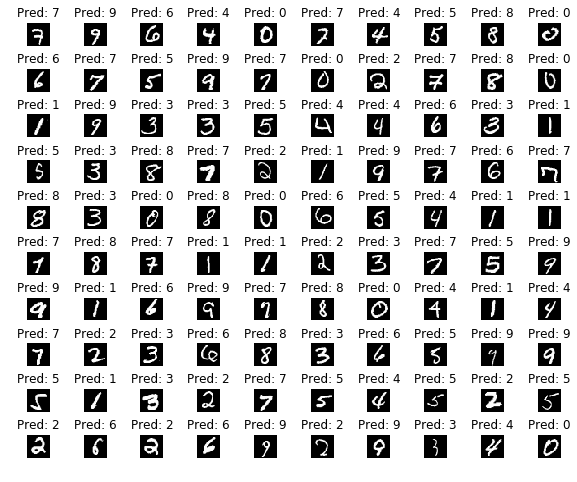

In [37]:
for i in range(n):
    plt.subplot(10, 10, i + 1)
    plt.subplots_adjust(hspace = 1)
    #print('Predicted Value for below image is: ')
    #print(predictions['classes'][i])
    img_pixels_new = img_pixels[i,:].reshape(28,28,1)
    img_pixels_new_min, img_pixels_new_max = np.min(img_pixels_new), np.max(img_pixels_new)
    wimg = 255.0 * (img_pixels_new[:, :, :].squeeze() - img_pixels_new_min) / (img_pixels_new_max - img_pixels_new_min)
    plt.imshow(wimg.astype('uint8'))
    #print("")
    plt.axis('off')
    plt.title("Pred: {}".format(predictions['classes'][i]))
    #plt.title(predictions['classes'][i])
    


In [39]:
#test on self created image. This image is hand wirtten in paint
my_img= misc.imread('Datasets/test_image.png')

In [40]:
print(my_img.shape)

(28, 28, 3)


In [41]:
from skimage import io
my_img = io.imread('Datasets/test_image.png', as_grey=True)

In [42]:
print(my_img.shape)

(28, 28)


In [43]:
import numpy as np
my_img = np.asarray(my_img)

In [44]:
my_img = my_img.flatten()
my_img_t = my_img.reshape(-1,784)
my_img_t = np.asarray(my_img_t)

In [45]:
print(my_img.shape)
print(my_img_t.shape)

(784,)
(1, 784)


In [46]:
predict_fn = predictor.from_saved_model("/final_mnist_hopefully/mnist_convnet_model/1519324326")
predictions = predict_fn(
        {"x": my_img_t})

INFO:tensorflow:Restoring parameters from b'/final_mnist_hopefully/mnist_convnet_model/1519324326\\variables\\variables'


Text(0.5,1,'[7]')

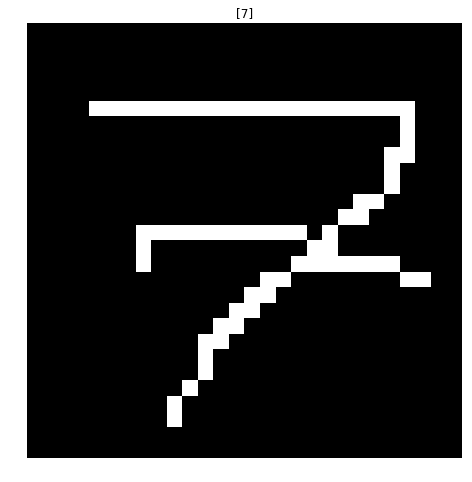

In [47]:
img_pixels_new = my_img_t[0,:].reshape(28,28,1)
img_pixels_new_min, img_pixels_new_max = np.min(img_pixels_new), np.max(img_pixels_new)
wimg = 255.0 * (img_pixels_new[:, :, :].squeeze() - img_pixels_new_min) / (img_pixels_new_max - img_pixels_new_min)
plt.imshow(wimg.astype('uint8'))
#print("")
plt.axis('off')
plt.title(predictions['classes'])